In [2]:
import numpy as np, Bio, matplotlib.pyplot as plot
from matplotlib.ticker import FormatStrFormatter
from Bio import SeqIO
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

font = {'family': 'monospace',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }

palette = [
    '#C8C8C8', '#145AFF', '#00DCDC', '#E60A0A', '#E6E600',
    '#00DCDC', '#E60A0A', '#EBEBEB', '#8282D2', '#0F820F', 
    '#0F820F', '#145AFF', '#E6E600', '#3232AA', '#DC9682', 
    '#FA9600', '#FA9600', '#B45AB4', '#3232AA', '#0F820F', 
    '#FFFFFF']


aa = 'ARNDCQEGHILKMFPSTWYV-'


# Pfad zur PHYLIP-Datei
fasta_file = "dataSources\TEM-1_Alignment_100_Homolgs.aln"

# Sequenzen aus der PHYLIP-Datei einlesen
sequences = SeqIO.to_dict(SeqIO.parse(fasta_file, "fasta"))

#Fata zu liste machen
msa = list(SeqIO.parse(fasta_file,'fasta'))
L = len(msa[0].seq)#286 stellen in erster spalte mit Index seq 
N = len(msa)#101 rows

#Wie oft kommt jede AS an jeder Postion vor 
-freq ein leerer Dataframe
-Consensusdatei erstellen

# Alignment of TEM-1 
- NCBI Blast:sp|P62593.1| "C:\Users\sveam\Documents\MOBI 23\Bioinfo\Alignments\Tot_Alignment_TEM.txt"
- balst search of 100 Proteins
- Search with RefSeq library 
    - This database contains NCBI RefSeq protein sequences from human, mouse, and prokaryotes, restricted to the RefSeq Select set of proteins. RefSeq Select includes one representative protein per protein-coding gene for human and mouse, and RefSeq proteins annotated on reference and representative genomes for prokaryote

## Results
- not only class A beta lactamase:
    -|WP_168837987.1|	serine hydrolase [Gammaproteobacteria]
    - 5 serine Hydrolase in total 
    - Rest only class A beta lactamase

In [3]:
freq = np.zeros([L,21])#leerer Dataframe 
display(freq)
concensus = np.zeros(L)


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [4]:
for i in range(0,N):
    for j in range(0,L):
        j_aa = aa.find(msa[i].seq[j])# in der row i auf seq zugreifen und dort an stelle j Aminosäure
        freq[j,j_aa] = freq[j,j_aa] + 1 #in leerem dataframe in der row=AS=j +1
for i in range(0, L):
    concensus[i] = freq[i].argmax()#argmax gibt index des elements mit höchstem wert in array für jede position i

conservation = np.sqrt(np.sum((np.square(freq/N - 0.05)),axis=1))

Varianz = Conservation Score= √∑(p_ia/N-0.05)^2

N=100

0.05 = 1/20= Erwartete Frequency 

#Variance
Pei and Grishin (2001) propose as a conservation measure the root mean square deviation between the amino acid distribution p~ia and the average amino acid distribution over the whole alignment pa, which they name Variance:



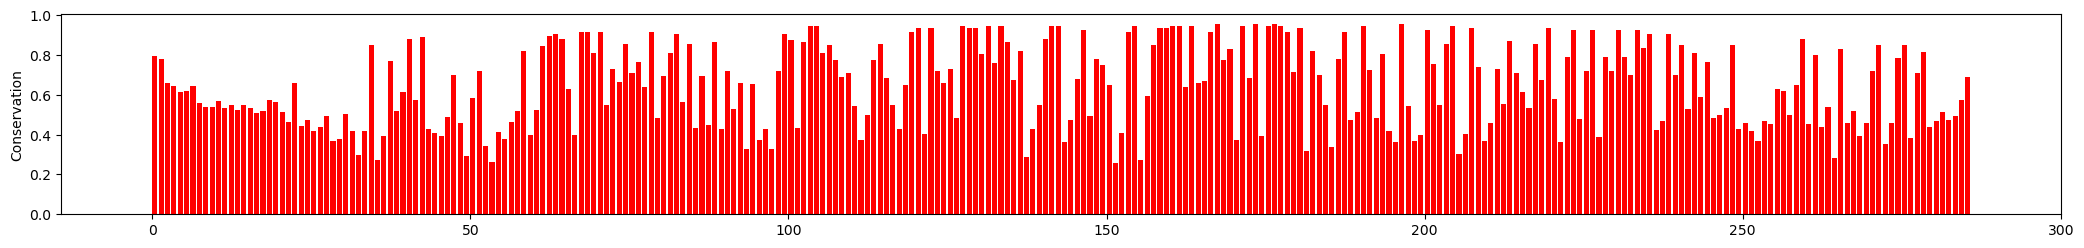

In [5]:
figure = plot.figure(figsize=(20,2))
axes = plot.axes([0,0,1,1]);
plot.close()

axes.bar(range(0,L),conservation, align='edge', linewidth = 0, color = 'red')
axes.set_ylabel('Conservation')

spacing_scale = axes.get_ylim()[1]/6
spacing = spacing_scale*2

seq_display = np.sort(np.random.randint(0,N,[5]))#Wir wählen nur 5 Alignments

figure

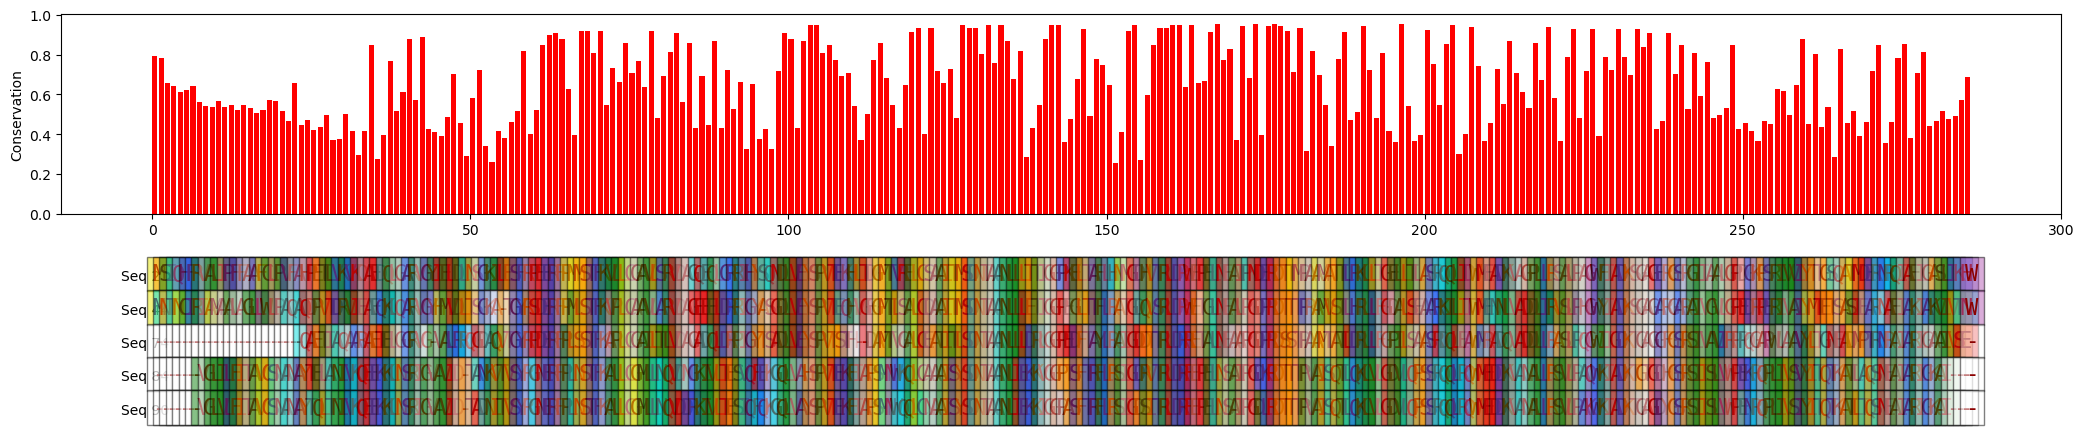

In [6]:

for j in seq_display:
    posit = -float(np.where(seq_display == j)[0]) * spacing_scale - spacing
    axes.text(-5,posit, "Seq "+(str(j+1)))
    for i in range(0, L):
        axes.text(float(i),posit, msa[j].seq[i],
            bbox=dict(facecolor=palette[aa.find(msa[j].seq[i])], alpha=0.5),fontdict=font)
        
figure

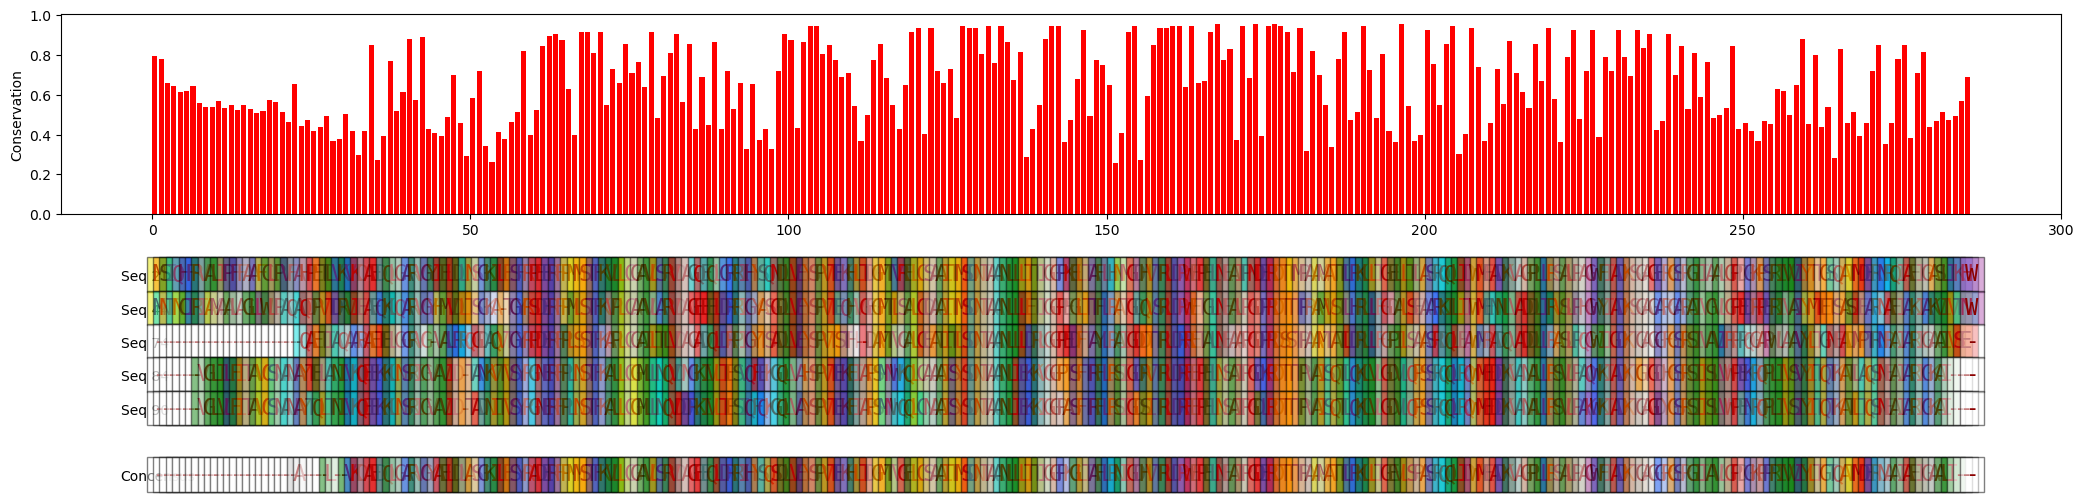

In [7]:
posit = posit - spacing
axes.text(-5,posit, "Concensus")
for i in range(0, L):
    axes.text(float(i),posit, 'ARNDCQEGHILKMFPSTWYV-'[int(concensus[i])] ,
                bbox=dict(facecolor=palette[int(concensus[i])], 
                alpha=0.5),fontdict=font)
    
figure

# Shannon entropy
The entropy for a profile column with amino acid frequencies p_ia is

E= - ∑p_ialog(p_ia)


In [8]:
#setzte positionen an denen keine AS vertretten ist (value=0, log=-inf ) auf nan um von den positionen wo eine as vertetten ist log(1)=0 zu unterscheiden 
with pd.option_context('mode.use_inf_as_na',True):
    log_nmb = np.log(freq)
    log_nmb[ log_nmb == -np.inf] = np.nan #negativ unenedlich wenn AS nicht vertretten 

# NaN-Werte ignorieren und Summe der nicht-maskierten Werte berechnen

# with np.errstate(divide="ignore"):
conservation_Shannon = np.nansum(freq.astype('float64')*log_nmb, axis=1, )
#kürze Shannon auf 263
conservation_Shannon_cut = conservation_Shannon[23:]


print(log_nmb)
display(conservation_Shannon)


[[       nan        nan        nan ...        nan        nan 4.39444915]
 [0.                nan 0.69314718 ...        nan        nan 4.39444915]
 [       nan        nan        nan ...        nan 0.         4.20469262]
 ...
 [1.38629436 1.60943791 0.         ...        nan        nan 3.8286414 ]
 [0.         0.         1.60943791 ... 0.                nan 3.98898405]
 [       nan        nan        nan ...        nan        nan 4.14313473]]


C:\Users\sveam\AppData\Local\Temp\ipykernel_2584\1321782412.py:3: RuntimeWarning: divide by zero encountered in log
  log_nmb = np.log(freq)


array([411.89472213, 387.15555569, 357.28099921, 348.44447527,
       339.57966177, 356.82897889, 365.72755449, 334.21601472,
       308.11249322, 318.00478936, 336.48304153, 321.15811422,
       340.66982259, 319.1323697 , 325.31920292, 321.12569227,
       312.84957601, 318.79493955, 337.8763779 , 346.8186192 ,
       325.10975936, 285.09498041, 383.52122452, 285.12956422,
       302.56920429, 280.18366786, 287.016947  , 313.5851954 ,
       268.64927595, 273.90962709, 321.80722   , 274.94130546,
       239.41028998, 281.38232693, 418.41778497, 242.68138763,
       278.72908772, 383.81529038, 296.07208   , 361.96575977,
       430.26323629, 342.91068307, 435.77957028, 290.86638158,
       275.69272341, 279.42758802, 285.12526434, 359.50160333,
       284.95647308, 237.06718947, 327.9885417 , 363.27642634,
       257.02833676, 223.00545232, 282.10294614, 264.40421598,
       313.77300675, 320.64007113, 400.32931472, 282.26831224,
       312.63865469, 411.34787022, 432.28230968, 437.82

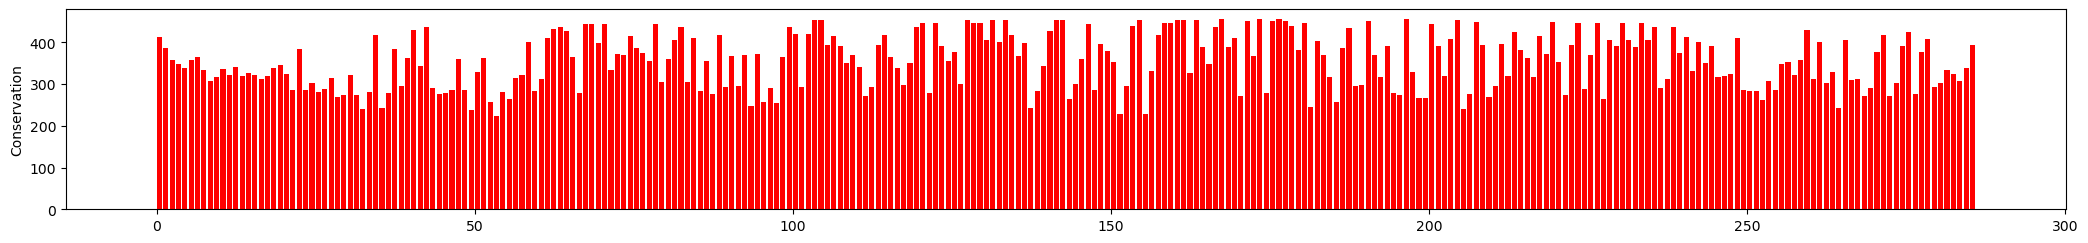

In [9]:
figure = plot.figure(figsize=(20,2))
axes = plot.axes([0,0,1,1]);
plot.close()

axes.bar(range(0,L),conservation_Shannon, align='edge', linewidth = 0, color = 'red')
axes.set_ylabel('Conservation')

spacing_scale = axes.get_ylim()[1]/6
spacing = spacing_scale*2

seq_display = np.sort(np.random.randint(0,N,[5]))#Wir wählen nur 5 Alignments

figure

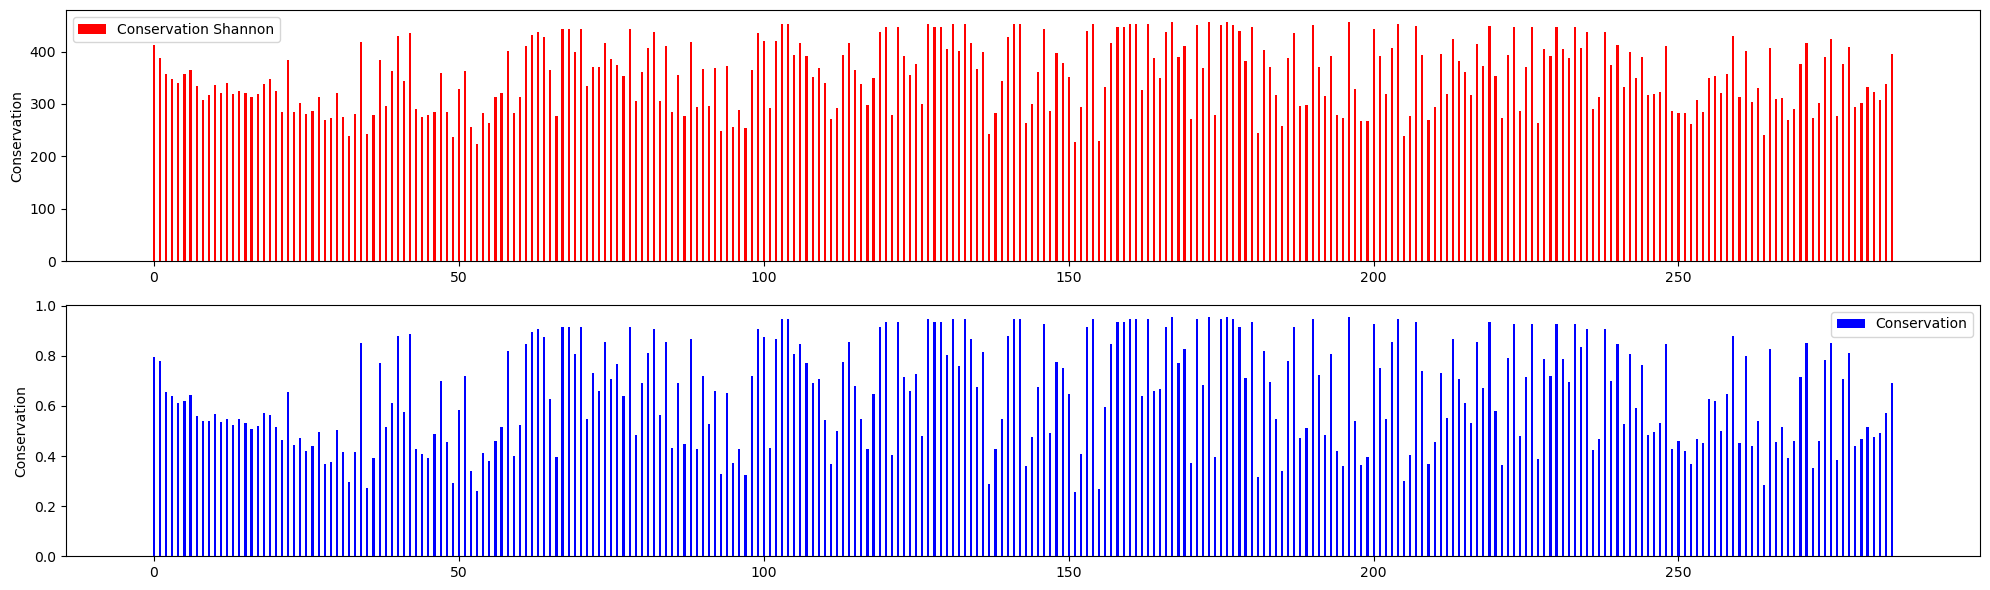

In [10]:
#Neuer Plot 

figure = plt.figure(figsize=(20, 6))
axes1 = plt.subplot(211)
axes2 = plt.subplot(212)

width = 0.35  # Breite der Bars
x = np.arange(L)  # X-Koordinaten für die Bars

axes1.bar(x, conservation_Shannon, width, align='center', linewidth=0, color='red', label='Conservation Shannon')
axes1.set_ylabel('Conservation')

axes2.bar(x, conservation, width, align='center', linewidth=0, color='blue', label='Conservation')
axes2.set_ylabel('Conservation')

spacing_scale = axes1.get_ylim()[1] / 6
spacing = spacing_scale * 2

seq_display = np.sort(np.random.randint(0, N, [5]))  # Wir wählen nur 5 Alignments

axes1.legend()
axes2.legend()

plt.tight_layout()
plt.show()

Conservation Vergleich mit DMS Mean Scores 

In [11]:

conservation.shape

# löschen der ersten 23 Werte
conservation_core_V = conservation[23:]
len(conservation_core_V)
#len(conservation)
type(conservation_core_V)
print(conservation_core_V)


[0.445044   0.47135914 0.41988283 0.43905644 0.4950943  0.36972642
 0.37655699 0.50373106 0.41660144 0.29809257 0.41589492 0.84966721
 0.27446511 0.39411071 0.76989048 0.51793181 0.61245867 0.87881829
 0.57446672 0.88891112 0.42705904 0.40948136 0.39111449 0.48811505
 0.7013964  0.45742708 0.29345247 0.58394462 0.72015343 0.34161321
 0.26241406 0.41424168 0.37966812 0.46126847 0.51584562 0.81780335
 0.39930001 0.52301717 0.84677795 0.89670685 0.90681679 0.87714349
 0.62841675 0.39659027 0.91692216 0.91692216 0.80779292 0.91692216
 0.54684061 0.73055974 0.66140189 0.85690495 0.70862684 0.76657277
 0.63847589 0.91692216 0.48286516 0.69295986 0.81094201 0.90681679
 0.56274327 0.85587474 0.43048846 0.6916855  0.44789835 0.86623493
 0.42911998 0.72096971 0.52675245 0.6600666  0.32725019 0.65304911
 0.37420667 0.42682943 0.32635029 0.71933623 0.90616794 0.87580134
 0.43275964 0.86680058 0.94596966 0.94596966 0.80706447 0.84805043
 0.772179   0.69012476 0.70696484 0.54234046 0.37025632 0.4998

In [12]:
import pandas as pd
df_mean = pd.read_pickle('position_means.pkl')

df_mean_z = df_mean[['mean_Stiffler_z', 'mean_Deng_z', 'mean_Firnberg_z', 'mean_all_z']].copy()
display(df_mean_z)
len(df_mean_z)

,mean_Stiffler_z,mean_Deng_z,mean_Firnberg_z,mean_all_z
Position,,,,
24,0.786898,0.089304,0.8918,0.577701
25,0.89939,0.180497,0.49345,0.510811
26,0.998662,0.670128,0.906685,0.849455
27,-0.510157,-0.255614,-0.514142,-0.426638
28,0.377421,0.132612,0.090621,0.20849
...,...,...,...,...
282,-0.337803,0.463454,-0.376808,-0.083719
283,-0.106276,0.31609,-0.152312,0.019167
284,0.824699,0.420258,0.974941,0.73577


263

# Correlation bewtween conservation Value & DMS Value:
- for the mean z normalised data 

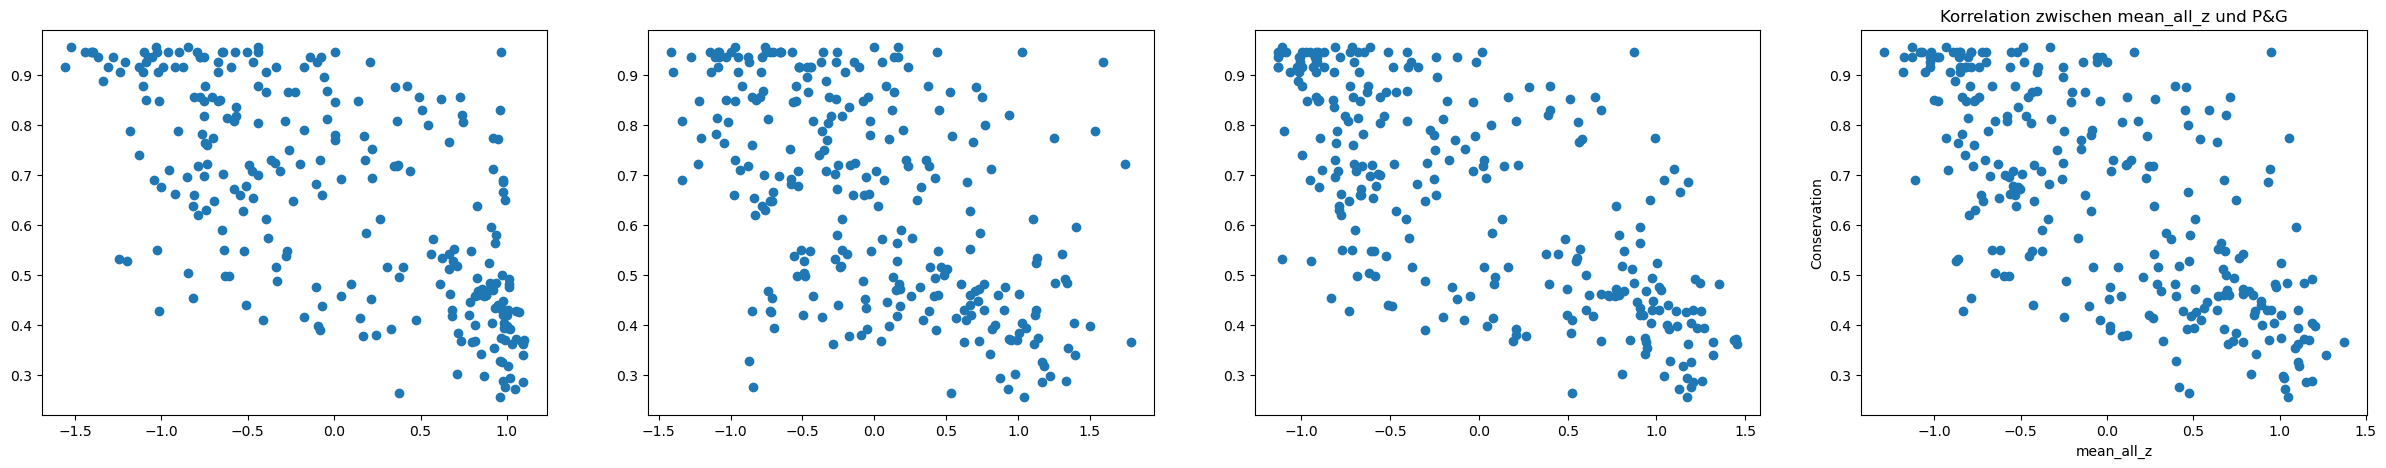

In [13]:

fig, axs = plt.subplots(1, 4, figsize=(30, 5))

for i, col in enumerate(df_mean_z.columns):
    axs[i].scatter(df_mean_z[col], conservation_core_V)
    plt.title(f'Korrelation zwischen {col} und P&G')
plt.xlabel(col)
plt.ylabel('Conservation')
   
plt.show()

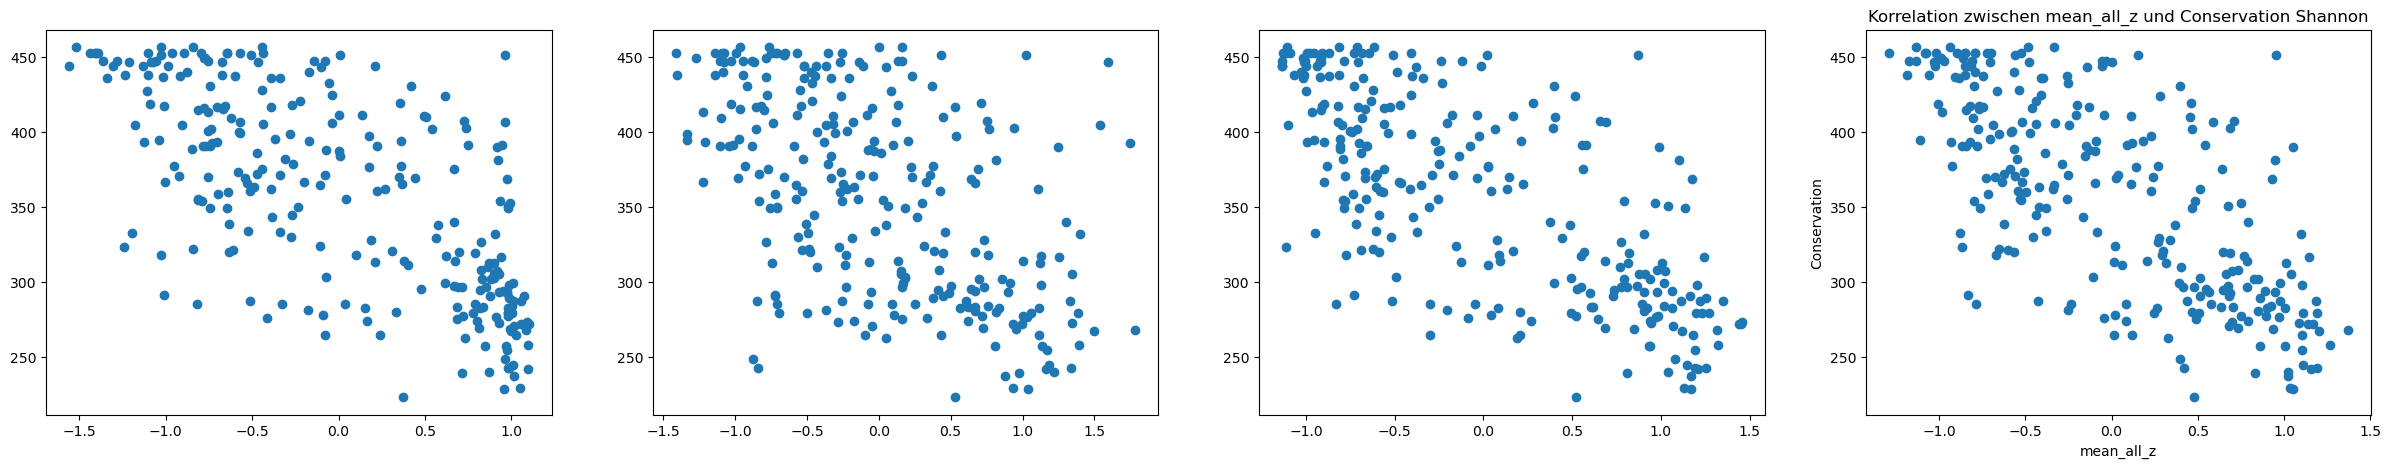

In [14]:

fig, axs = plt.subplots(1, 4, figsize=(30, 5))
for i, col in enumerate(df_mean_z.columns):
    axs[i].scatter(df_mean_z[col], conservation_Shannon_cut)
    plt.title(f'Korrelation zwischen {col} und Conservation Variance')
    plt.xlabel(col)
    plt.ylabel('Conservation')
    plt.title(f'Korrelation zwischen {col} und Conservation Shannon')
plt.show()

Genauere scatter plots? 
Wir würden hohe conservation bei niedrigem fitness erwarten und geringe conservation bei hoher fitness 

In [15]:
#Dataframe erweitern um Conservation scores

df_DMS_Conserv = df_mean_z.copy()
df_DMS_Conserv['Conserved'] = conservation_core_V
df_DMS_Conserv_S = df_DMS_Conserv.copy()
df_DMS_Conserv_S['Conserved_Shannon'] = conservation_Shannon_cut


z- Normalisieren

In [16]:
#z normalisierung der Shannon conservation und Pei Grishish Conservation
df_DMS_Conserv_S_Norm = df_DMS_Conserv_S.copy()

def z_score(column):
    mean = column.mean()
    std = column.std()
    z_scores = (column - mean) / std
    return z_scores


df_DMS_Conserv_S_Norm['Conserved_Shannon'] = z_score(df_DMS_Conserv_S['Conserved_Shannon'])
df_DMS_Conserv_S_Norm['Pei&Grishin'] = z_score(df_DMS_Conserv_S['Conserved'])

# min max mean checken 
max =df_DMS_Conserv_S_Norm.max()
min = df_DMS_Conserv_S_Norm.min()
mean = df_DMS_Conserv_S_Norm.mean()
print(max)
print(min)
print(mean)

mean_Stiffler_z      1.100456
mean_Deng_z          1.784508
mean_Firnberg_z       1.45559
mean_all_z           1.373021
Conserved            0.955866
Conserved_Shannon    1.498153
Pei&Grishin          1.447492
dtype: object
mean_Stiffler_z     -1.558302
mean_Deng_z         -1.411927
mean_Firnberg_z     -1.133084
mean_all_z          -1.290478
Conserved            0.255218
Conserved_Shannon    -2.02082
Pei&Grishin         -1.894368
dtype: object
mean_Stiffler_z      3.518507e-03
mean_Deng_z         -7.626846e-03
mean_Firnberg_z     -1.474818e-02
mean_all_z          -5.228674e-03
Conserved            6.523875e-01
Conserved_Shannon    1.350842e-16
Pei&Grishin         -2.904310e-16
dtype: float64


<Axes: xlabel='Position'>

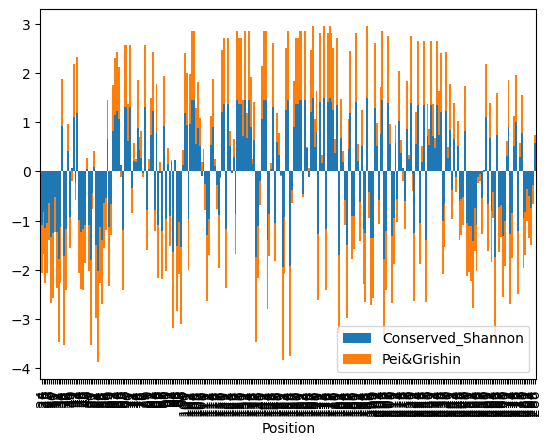

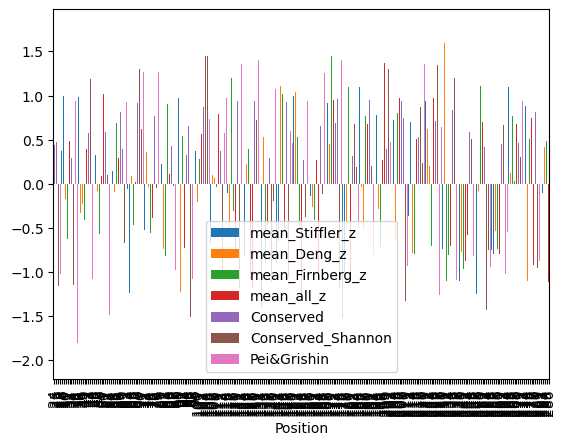

In [17]:
# P&G und Shannon after Normalisation

figsize = (150,100)
col_plot = ['Conserved_Shannon', 'Pei&Grishin']
df_DMS_Conserv_S_Norm[col_plot].plot(kind = 'bar', stacked = True, width= 1)
df_DMS_Conserv_S_Norm.plot(kind = 'bar')

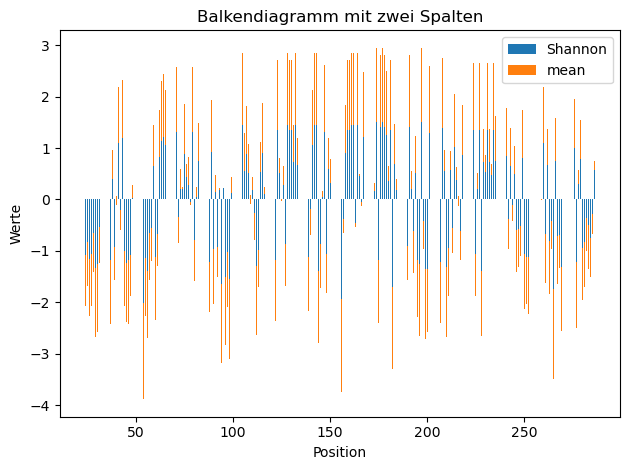

In [18]:
x = np.arange(24.0, 287.0, 1.0)
width = 0.35
fig, ax = plt.subplots()

rects1 = ax.bar(x, df_DMS_Conserv_S_Norm['Conserved_Shannon'], width, label='Shannon')
rects2 = ax.bar(x, df_DMS_Conserv_S_Norm['Pei&Grishin'], width, bottom=df_DMS_Conserv_S_Norm['Conserved_Shannon'], label='mean')

ax.set_xlabel('Position')
ax.set_ylabel('Werte')
ax.set_title('Balkendiagramm mit zwei Spalten')
ax.legend()

plt.tight_layout()
plt.show()

Both Conservation methods give similar values 

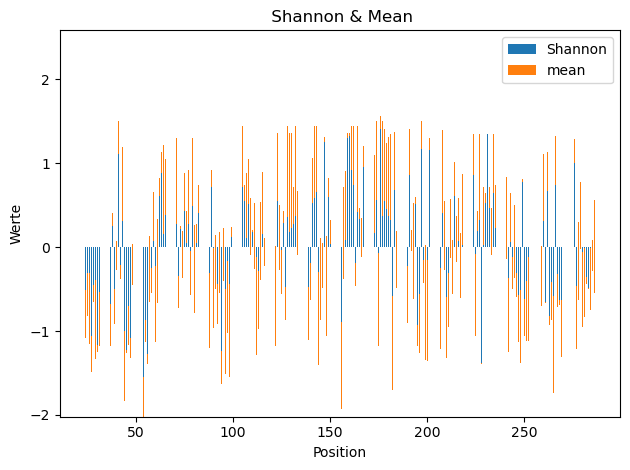

In [19]:
x = np.arange(24.0, 287.0, 1.0)
width = 0.35
fig, ax = plt.subplots()

rects1 = ax.bar(x, df_DMS_Conserv_S_Norm['Conserved_Shannon'], width, label='Shannon')
rects2 = ax.bar(x, df_DMS_Conserv_S_Norm['mean_all_z'], width, bottom=df_DMS_Conserv_S_Norm['Conserved_Shannon'], label='mean')

ax.set_xlabel('Position')
ax.set_ylabel('Werte')
ax.set_title(' Shannon & Mean')
ax.legend()

plt.tight_layout()
plt.show()

Only a few positions show huge difference in Conservation and DMS, 
- no opposite directions 
- small mean values while Conservation is close to zero 
## mean val pos und neg ?

[[1.         0.99118175]
 [0.99118175 1.        ]]


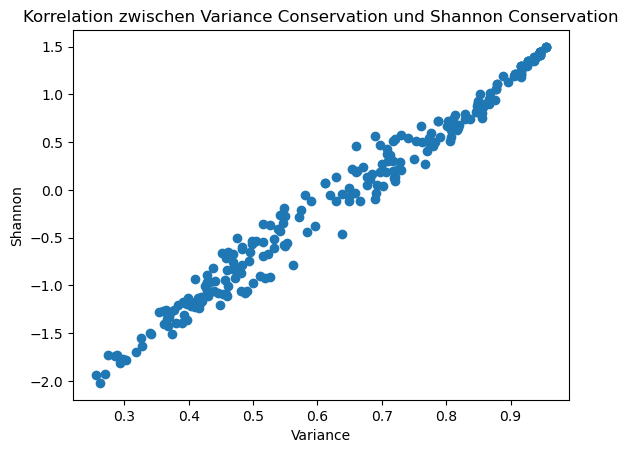

In [20]:
#Vergeich der Conserved methods
corr = np.corrcoef(conservation_core_V, z_score(df_DMS_Conserv_S['Conserved_Shannon']))
print(corr)

plt.scatter(conservation_core_V, z_score(df_DMS_Conserv_S['Conserved_Shannon']))
plt.xlabel('Variance')
plt.ylabel('Shannon')
plt.title('Korrelation zwischen Variance Conservation und Shannon Conservation')
plt.show()

In [21]:
Shannon_Cons =  z_score(df_DMS_Conserv_S['Conserved_Shannon'])
Variance_Cons = conservation_core_V



In [22]:
# Data Frame neu einlesen

C_df_New: pd.DataFrame = pd.read_csv('df_DMS_Conserved_Index.csv', delimiter = ',')
display(C_df_New)

,Position,mean_Stiffler_z,mean_Deng_z,mean_Firnberg_z,mean_all_z,Conserved,Conserved_Shannon
0,24,0.786898,0.089304,0.891800,0.577701,0.445044,-1.083764
1,25,0.899390,0.180497,0.493450,0.510811,0.471359,-0.820711
2,26,0.998662,0.670128,0.906685,0.849455,0.419883,-1.158366
3,27,-0.510157,-0.255614,-0.514142,-0.426638,0.439056,-1.055295
4,28,0.377421,0.132612,0.090621,0.208490,0.495094,-0.654550
...,...,...,...,...,...,...,...
258,282,-0.337803,0.463454,-0.376808,-0.083719,0.515465,-0.358021
259,283,-0.106276,0.316090,-0.152312,0.019167,0.475500,-0.503238
260,284,0.824699,0.420258,0.974941,0.735770,0.492911,-0.743719
261,285,0.574070,0.050248,0.486125,0.368077,0.571215,-0.287563


In [23]:
#Korrelation
cor_df = pd.DataFrame(columns =['Shannon', 'Var'])

for col in C_df_New.columns:
    if col == 'Position':
        continue
    else:

        cor_v = C_df_New[col].corr(C_df_New['Conserved'])
        
        cor_S = C_df_New[col].corr(Shannon_Cons)
    
        cor_df = cor_df.append({'Var': cor_v, 'Shannon': cor_S}, ignore_index=True)    

cor_df = cor_df.rename(index={0: 'Stiffler', 1: 'Deng', 2: 'Firnberg', 3: 'Mean', 4 :'variance', 5 : 'Shannon'})
display(cor_df)

#

C:\Users\sveam\AppData\Local\Temp\ipykernel_2584\1134686502.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cor_df = cor_df.append({'Var': cor_v, 'Shannon': cor_S}, ignore_index=True)
C:\Users\sveam\AppData\Local\Temp\ipykernel_2584\1134686502.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cor_df = cor_df.append({'Var': cor_v, 'Shannon': cor_S}, ignore_index=True)
C:\Users\sveam\AppData\Local\Temp\ipykernel_2584\1134686502.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cor_df = cor_df.append({'Var': cor_v, 'Shannon': cor_S}, ignore_index=True)
C:\Users\sveam\AppData\Local\Temp\ipykernel_2584\1134686502.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future ve

,Shannon,Var
Stiffler,-0.016787,-0.667150
Deng,-0.124452,-0.533125
Firnberg,-0.012285,-0.702616
Mean,-0.055313,-0.693817
variance,-0.051339,1.000000
Shannon,-0.047938,0.991182


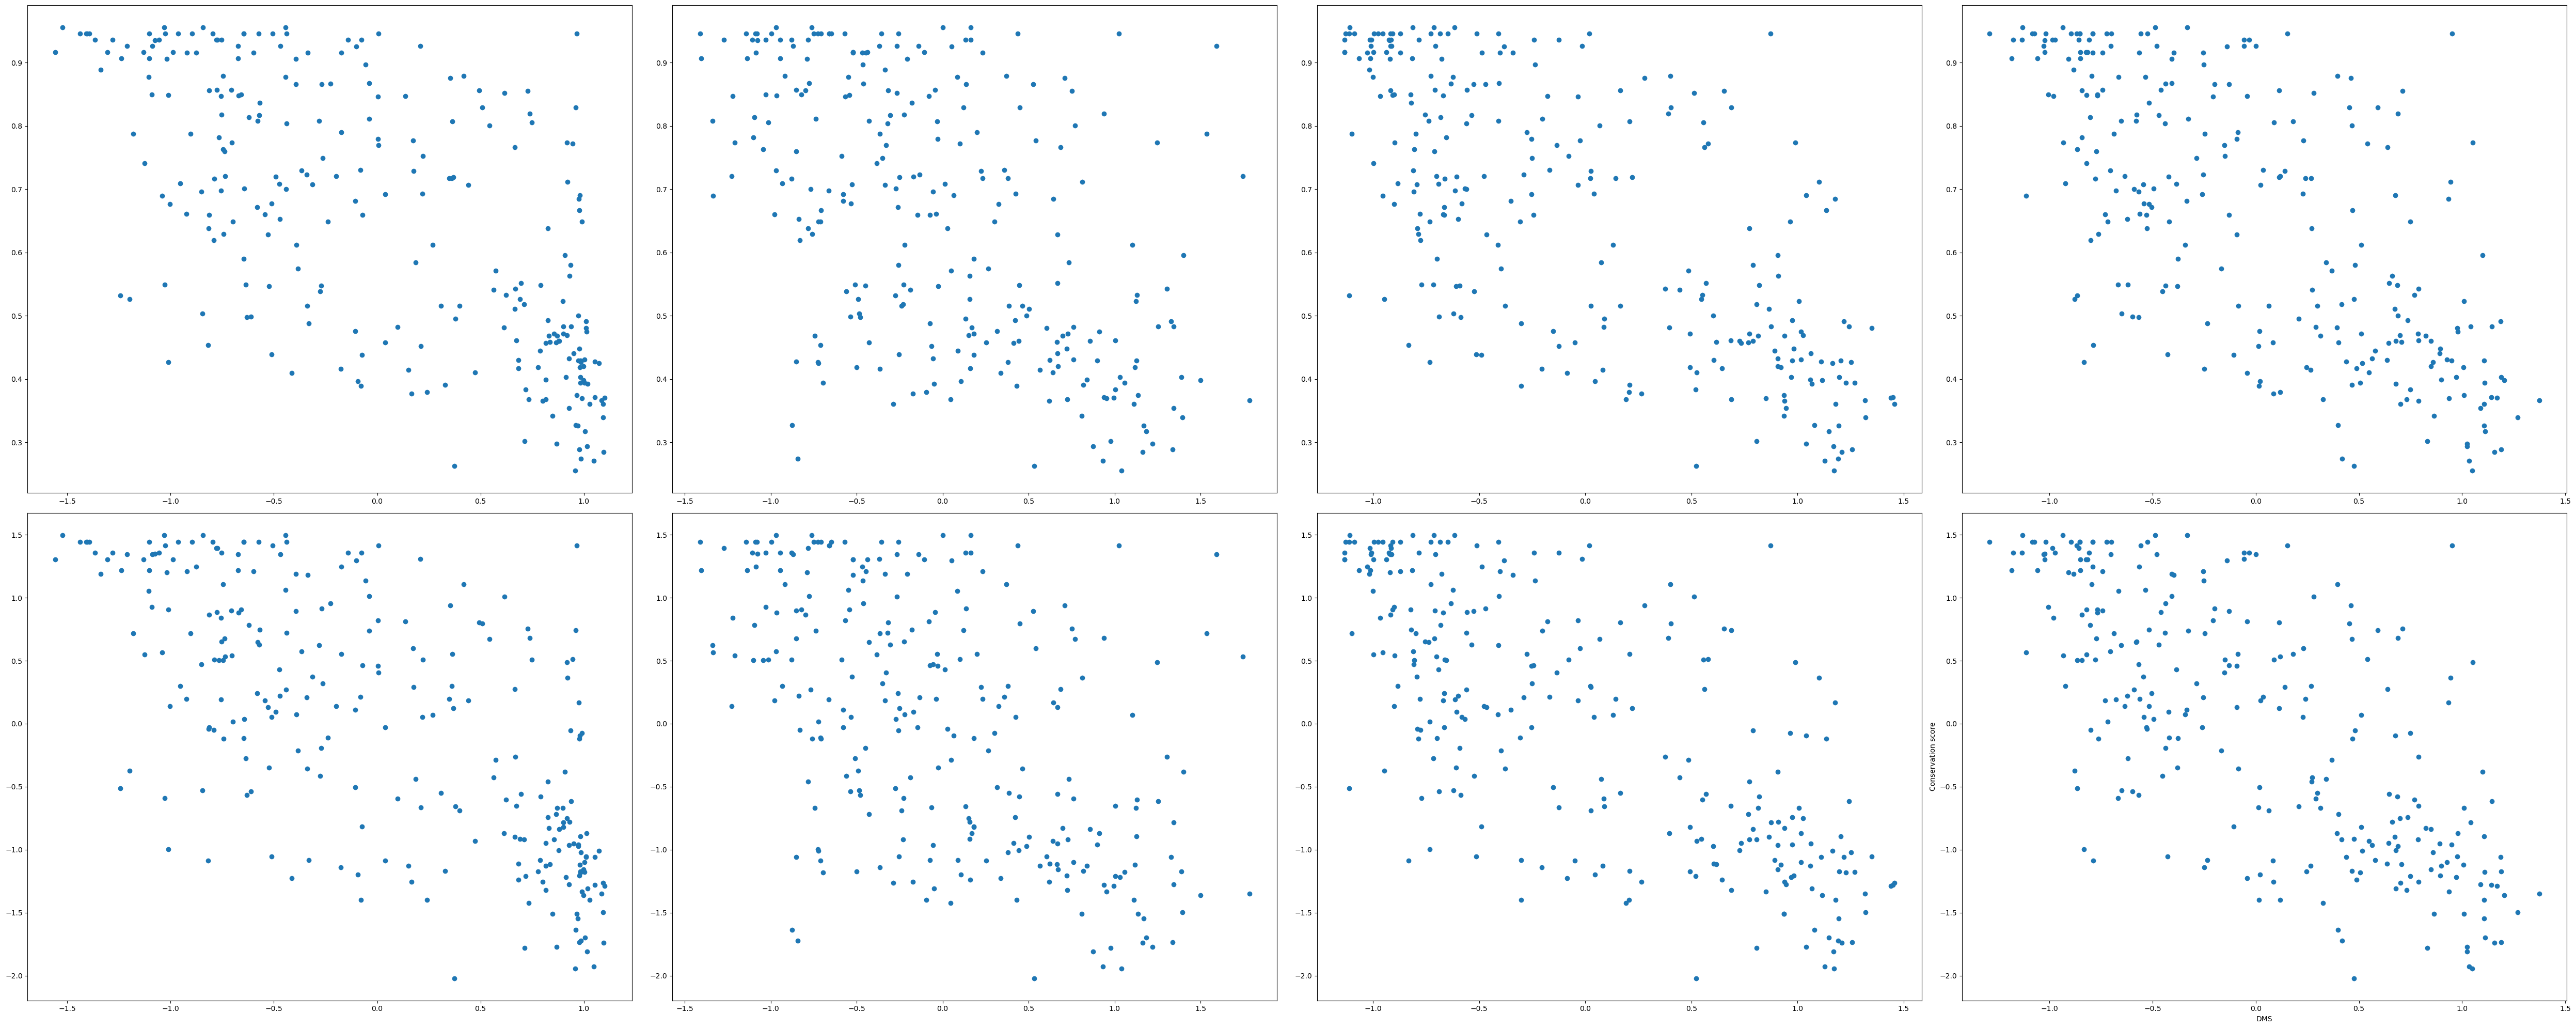

In [24]:
fig, axs = plt.subplots(2, 4, figsize=(50, 20))

for i, col in enumerate(C_df_New.columns):
    if col == 'Position' or col == 'Conserved' or col =='Conserved_Shannon':
        continue
    else:
        axs[0,i-1].scatter(C_df_New[col], C_df_New['Conserved'])
        axs[1,i-1].scatter(C_df_New[col], C_df_New['Conserved_Shannon'])

plt.xlabel('DMS')
plt.ylabel('Conservation score')
plt.tight_layout()
plt.show()

Conservation Score

## Calculation of concensus matrix:
- score should be a quantification of probability of replacement of AS X with Y

1. Identity matrix – Exact matches receive one score and non-exact
matches a different score (1 on the diagonal 0 everywhere else)
2. Mutation data matrix – a scoring matrix compiled based on
observation of protein mutation rates: some mutations are
observed more often then other (PAM, BLOSUM).
3. Physical properties matrix – amino acids with with similar
biophysical properties receive high score.
4. Genetic code matrix – amino acids are scored based on
similarities in the coding triple. 
5. Take the most frequent amino acids in the Alignment

### PAM Point Accepted Mutation /Percent Accepted Mutation
Two sequences S and T are defined to be 1 PAM unit
diverged if a series of accepted point mutation (and no
insertion/deletion) can convert S to T with an average of
one mutation per 100 res. 

### BLOSUM
Block Substitution Matrix (Henikoff, Henikoff 1992)
Block – a short contiguous interval of multiple aligned sequences
BLOCKS – data base of of highly conserved aligned sequences
representing hundredths of protein groups.
http://blocks.fhcrc.org/blocks/ (http://blocks.fhcrc.org/blocks/)

Blosum percantage is a quantity of relation within the aligned sequences, as we took the first 100 in degrading number of identity, we need to take a high percentage, to get a lower conservation score  

Choose a percent threshold say 80%
BLOSUM62 – most similar to PAM250 (believed to be better) 

### Our approach
Try, 1,2,5 with PAM250,PAM460 and Blosum62

In [25]:
#Consensus = am häufigsten vorkommende AS in Sequenz 
#Übersetze Zahlencode in Buchstabencode der Sequenz 

aa = 'ARNDCQEGHILKMFPSTWYV-'
concensusseq = []
for z,i in enumerate(concensus):
    letter = aa[int(i)]
    # print(letter)    
    concensusseq.append(letter)

print(concensusseq)




['-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', 'A', '-', '-', '-', '-', 'L', '-', '-', 'V', 'K', 'D', 'A', 'E', 'D', 'Q', 'L', 'G', 'A', 'R', 'V', 'G', 'Y', 'A', 'E', 'L', 'D', 'L', 'A', 'S', 'G', 'K', 'I', 'L', 'E', 'S', 'Y', 'R', 'A', 'D', 'E', 'R', 'F', 'P', 'M', 'M', 'S', 'T', 'F', 'K', 'V', 'L', 'L', 'C', 'G', 'A', 'V', 'L', 'S', 'R', 'V', 'D', 'A', 'G', 'E', 'E', 'Q', 'L', 'D', 'R', 'R', 'I', 'H', 'Y', 'S', 'Q', 'S', 'D', 'L', 'V', 'E', 'Y', 'S', 'P', 'V', 'T', 'E', 'K', 'H', 'L', 'T', 'D', 'G', 'M', 'T', 'V', 'G', 'E', 'L', 'C', 'S', 'A', 'A', 'I', 'T', 'M', 'S', 'D', 'N', 'T', 'A', 'A', 'N', 'L', 'L', 'L', 'T', 'T', 'I', 'G', 'G', 'P', 'K', 'G', 'L', 'T', 'A', 'F', 'L', 'R', 'N', 'I', 'G', 'D', 'H', 'V', 'T', 'R', 'L', 'D', 'R', 'W', 'E', 'P', 'E', 'L', 'N', 'E', 'A', 'I', 'P', 'G', 'D', 'E', 'R', 'D', 'T', 'T', 'T', 'P', 'A', 'A', 'M', 'A', 'T', 'T', 'L', 'R', 'K', 'L', 'L', 'T', 'G', 'E', 'V', 'L', 'S', 'P', 'A',

# Alignment Concensus (5.)

In [75]:
from Bio import Align
from Bio import pairwise2
aligner = Align.PairwiseAligner()
#aligner.match_score = 1.0
#aligner.mismatch_score = -2.0
#aligner.gap_score = -2.5
Concensus_Calc = ''.join(concensusseq)
#score = aligner.score(Concensus_Calc,msa[0].seq)
score = pairwise2.align.globalms(Concensus_Calc, msa[0].seq, 1.0, -2.0, -2.5, -1.0)
identical = pairwise2.align.globalms(Concensus_Calc, msa[0].seq, 1.0, 0.0, 0.0, 0.0)
print(score[0].score)
print(identical[0].score)
#score = pairwise2.align.globalms(Concensus_Calc,msa[0].seq, score_only=True, match_score=1.0, mismatch_score=-1.0, gap_score = -1.5)
seq_Conc_Calc = Bio.pairwise2.format_alignment(Concensus_Calc,msa[0].seq, score[0].score, 23,286, full_sequences= False ) 

print(seq_Conc_Calc)


115.0
229.0
 2 ----L--VKDAEDQLGARVGYAELDLASGKILESYRADERFPMMSTFKVLLCGAVLSRVDAGEEQLDRRIHYSQSDLVEYSPVTEKHLTDGMTVGELCSAAITMSDNTAANLLLTTIGGPKGLTAFLRNIGDHVTRLDRWEPELNEAIPGDERDTTTPAAMATTLRKLLTGEVLSPASRQQLIDWMEADKVAGPLLRSALPAGWFIADKTGAGGRGSRGIIAVLGPDGKPPRIVVIYLTGTQATMDERNAAIAEIGAALI---
       |  ||||||||||||||.||||.|||||||.|..||||||||||||||||||||||||.|||.|||||||.|||||||||||||||||||.||||||||||||||||||||||||||.|||||.|.|||||||||||||||||||.||||||.|||||||||||||||.|..|||||||||||||||||||||||||||||||||.|||.||||||||.|||||||.||||||.||.||||||||..||||||.||   
24 HPETLVKVKDAEDQLGARVGYIELDLNSGKILESFRPEERFPMMSTFKVLLCGAVLSRVDAGQEQLGRRIHYSQNDLVEYSPVTEKHLTDGMTVRELCSAAITMSDNTAANLLLTTIGGPKELTAFLHNMGDHVTRLDRWEPELNEAIPNDERDTTMPAAMATTLRKLLTGELLTLASRQQLIDWMEADKVAGPLLRSALPAGWFIADKSGAGERGSRGIIAALGPDGKPSRIVVIYTTGSQATMDERNRQIAEIGASLIKHW
  Score=115



80% conserved

In [27]:
#EMBOSS Concensussequnez zur überprüfung PAM460
with open("emboss_cons-I20230625-175340-0830-54160326-p1m.txt", "r") as file:
    Conc_E = file.read()
    seq_Conc_E = Conc_E.replace("x", "-")
    seq_Conc_E = seq_Conc_E[12:]

print(seq_Conc_E)
aligner.match_score = 1.0
aligner.mismatch_score = -2.0
aligner.gap_score = -2.5
score = pairwise2.align.globalxx(seq_Conc_E.strip(),msa[0].seq.strip(), score_only=True)
seq_Conc_Calc = Bio.pairwise2.format_alignment(seq_Conc_E,msa[0].seq, score, 23,286, full_sequences= False ) 
print(seq_Conc_Calc)
print(score)



----------------------A--E-L--LKD-EDRLGGRLG---LDLDGGR--DGYRPDERFPL-STFKVLLCGTLLSRVDDGEEDLDRRIHY-EDDLVEYSPVTEKHLGDGLSLGELCDAALTLSDNTAGNLLLD-LGGPKGLTEFLRDLGDHITRLDRWEPELNEGLPGDERDTT-PDAMT-SLRRLLLGDLLTPDSRDHLVDWL-DDRVGGPLLRAGLPDGWFIGDRSGGGDHGSRGVIGLL-PDGRPPWLV-LYLTGSDASLDERDKELAELG-ALI---

 2 --E-L--LKD-EDRLGGRLG---LDLDGGR--DGYRPDERFPL-STFKVLLCGTLLSRVDDGEEDLDRRIHY-EDDLVEYSPVTEKHLGDGLSLGELCDAALTLSDNTAGNLLLD-LGGPKGLTEFLRDLGDHITRLDRWEPELNEGLPGDERDTT-PDAMT-SLRRLLLGDLLTPDSRDHLVDWL-DDRVGGPLLRAGLPDGWFIGDRSGGGDHGSRGVIGLL-PDGRPPWLV-LYLTGSDASLDERDKELAELG-ALI---
     | |  .|| ||.||.|.|   |||..|.  ...||.||||. |||||||||..|||||.|.|.|.||||| ..|||||||||||||.||....|||.||.|.|||||.||||. .||||.||.||...|||.||||||||||||..|.|||||| |.||. .||.||.|.|||..||..|.||. .|.|.|||||..||.||||.|.||.|..||||.|..| |||.|...| .|.|||.|..|||....||.| .||   
24 HPETLVKVKDAEDQLGARVGYIELDLNSGKILESFRPEERFPMMSTFKVLLCGAVLSRVDAGQEQLGRRIHYSQNDLVEYSPVTEKHLTDGMTVRELCSAAITMSDNTAANLLLTTIGGPKELTAFLHNMGDHVTRLDRWEPELNEAIPNDERDTTMPAAMATTLRKLLTGELLT

56% conserved 

In [78]:
#EMBOSS CONCENSUS EBLOSUM62
with open("emboss_cons_blosum62.txt", "r") as file:
    Conc_E62 = file.read()
    seq_Conc_E62 = Conc_E62.replace("x", "-")
    seq_Conc_E62 = seq_Conc_E62[11:]
print(seq_Conc_E62)

aligner.match_score = 1.0
aligner.mismatch_score = -2.0
aligner.gap_score = -2.5
score = pairwise2.align.globalms(seq_Conc_E62, msa[0].seq, 1.0, -2.0, -2.5, -1.0)
identical = pairwise2.align.globalxx(seq_Conc_E62.strip(),msa[0].seq.strip(), score_only=True)
seq_Conc_Calc = Bio.pairwise2.format_alignment(seq_Conc_E62,msa[0].seq, score[0].score, 23,286, full_sequences= False ) 
print(seq_Conc_Calc)
print(score[0].score)
print(identical)





----------------------A----L--VK--E-QLGARVG---LDLSSGK-L-SYR-DERFPM-STFKVLLCGAVLSRVDAGEEQLDRRI-YSQNDLV-YSPVTEKHI-DGMTV-ELC-AAITMSDNTAANLLL-TIGGPK-LTAFLR-IGD-VTRLDRWEPELNEAIPGD-RDTTTP-AMA-TLRKLL-GEVLS--SRQQLV-WM--DKVAGPLLRS-LPAGW-IADKTGAG--GSR-IIAVL-PD-K---IV-IYLT-TEATMDERN--IAEIG-ALI---

 2 A----L--VK--E-QLGARVG---LDLSSGK-L-SYR-DERFPM-STFKVLLCGAVLSRVDAGEEQLDRRI-YSQNDLV-YSPVTEKHI-DGMTV-ELC-AAITMSDNTAANLLL-TIGGPK-LTAFLR-IGD-VTRLDRWEPELNEAIPGD-RDTTTP-AMA-TLRKLL-GEVLS--SRQQLV-WM--DKVAGPLLRS-LPAGW-IADKTGAG--GSR-IIAVL-PD-K---IV-IYLT-TEATMDERN--IAEIG-ALI--
   .    .  ..  . .......   ...|... . ... .....| .....|............|....|.. ....... ......... ..... ... |........|..||. ..|... ...... ... .................. ..|... ... ....|. .....  ..|... ..  ......|... ..... ........  ... |.|.. .. .   .| .... .........  ..... ...  
24 HPETLVKVKDAEDQLGARVGYIELDLNSGKILESFRPEERFPMMSTFKVLLCGAVLSRVDAGQEQLGRRIHYSQNDLVEYSPVTEKHLTDGMTVRELCSAAITMSDNTAANLLLTTIGGPKELTAFLHNMGDHVTRLDRWEPELNEAIPNDERDTTMPAAMATTLRKLLTGELL

In [29]:
#Vergleiche Concensussequenzen PAM460 mit Blosum62
aligner.match_score = 1.0
aligner.mismatch_score = -2.0
aligner.gap_score = -2.5
score = pairwise2.align.globalxx(seq_Conc_E62,seq_Conc_E, score_only=True)
seq_Conc_Calc = Bio.pairwise2.format_alignment(seq_Conc_E62,seq_Conc_E, score, 23,286, full_sequences= False ) 
print(seq_Conc_Calc)
print(score)


2 A----L--VK--E-QLGARVG---LDLSSGK-L-SYR-DERFPM-STFKVLLCGAVLSRVDAGEEQLDRRI-YSQNDLV-YSPVTEKHI-DGMTV-ELC-AAITMSDNTAANLLL-TIGGPK-LTAFLR-IGD-VTRLDRWEPELNEAIPGD-RDTTTP-AMA-TLRKLL-GEVLS--SRQQLV-WM--DKVAGPLLRS-LPAGW-IADKTGAG--GSR-IIAVL-PD-K---IV-IYLT-TEATMDERN--IAEIG-ALI--
   | |  | ..| . ..|... || ...... |. ... .....  .....|.........|..|....|..  ...... ......... ..... ... |...........||.|..|... ...... ... .................. ..| .. ..  ..|.|| .....  ...... .   ......|... ..... .....|..  ... |...  .. .   .  .... .........  ....  .. ||
2 --E-L--LKD-EDRLGGRLG---LDLDGGR--DGYRPDERFPL-STFKVLLCGTLLSRVDDGEEDLDRRIHY-EDDLVEYSPVTEKHLGDGLSLGELCDAALTLSDNTAGNLLLD-LGGPKGLTEFLRDLGDHITRLDRWEPELNEGLPGDERDTT-PDAMT-SLRRLLLGDLLTPDSRDHLVDWL-DDRVGGPLLRAGLPDGWFIGDRSGGGDHGSRGVIGLL-PDGRPPWLV-LYLTGSDASLDERDKELAELG-ALI---
  Score=194

194.0


PAM460 & Blossum62 sind nicht identisch

In [30]:
#EMBOSS CONCENSUS PAM250
with open("emboss_cons-PAM250.txt", "r") as file:
    Conc_PAM250 = file.read()
    seq_Conc_PAM250 = Conc_PAM250.replace("x", "-")
    seq_Conc_PAM250 = seq_Conc_PAM250[11:]
print(seq_Conc_PAM250)

aligner.match_score = 1.0
aligner.mismatch_score = -2.0
aligner.gap_score = -2.5
score = pairwise2.align.globalxx(seq_Conc_PAM250,msa[0].seq, score_only=True)
seq_Conc_Calc = Bio.pairwise2.format_alignment(seq_Conc_PAM250,msa[0].seq, score, 23,286, full_sequences= False ) 
print(seq_Conc_Calc)
print(score)


----------------------A----L--IK--E-QLGGRIG---LDL-SGR-L-GYRPDERFPM-STFKVLLCGAILSRIDAGQEQLDRRIHYSQDDLI-YSPITEKHLGDGMTIGELC-AAITMSDNTAGNLLL-TIGGP-GLTAFLRNMGDHITRLDRWEPELNEAIPGD-RDTTTP-AMATTLRKLLLGEVLT-SSRQQLIDWM--DKVGGPLLRSGLPAGWFIGDKTGAGDHGSRGIIAVL-PDGKPPRIV-IYLTDTQATMDERD--IA-IG-ALI---

 2 A----L--IK--E-QLGGRIG---LDL-SGR-L-GYRPDERFPM-STFKVLLCGAILSRIDAGQEQLDRRIHYSQDDLI-YSPITEKHLGDGMTIGELC-AAITMSDNTAGNLLL-TIGGP-GLTAFLRNMGDHITRLDRWEPELNEAIPGD-RDTTTP-AMATTLRKLLLGEVLT-SSRQQLIDWM--DKVGGPLLRSGLPAGWFIGDKTGAGDHGSRGIIAVL-PDGKPPRIV-IYLTDTQATMDERD--IA-IG-ALI--
   .    .  ..  . .......   ... ... . .........| .....|.................|......|... ................... |........|..||. ..|.. .............................. ..|... ...|....|....... |..|......  ...|..|........................|.|.. ........| ..............  .. .. ...  
24 HPETLVKVKDAEDQLGARVGYIELDLNSGKILESFRPEERFPMMSTFKVLLCGAVLSRVDAGQEQLGRRIHYSQNDLVEYSPVTEKHLTDGMTVRELCSAAITMSDNTAANLLLTTIGGPKELTAFLHNMGDHVTRLDRWEPELNEAIPNDERDTTMPAAMATTLRKLLTGELL

In [31]:
#Vergleiche Concensussequenzen PAM250 mit Blosum62
aligner.match_score = 1.0
aligner.mismatch_score = -2.0
aligner.gap_score = -2.5
score = pairwise2.align.globalxx(seq_Conc_PAM250,seq_Conc_E, score_only=True)
seq_Conc_Calc = Bio.pairwise2.format_alignment(seq_Conc_PAM250,seq_Conc_E, score, 23,286, full_sequences= False ) 
print(seq_Conc_Calc)
print(score)

2 A----L--IK--E-QLGGRIG---LDL-SGR-L-GYRPDERFPM-STFKVLLCGAILSRIDAGQEQLDRRIHYSQDDLI-YSPITEKHLGDGMTIGELC-AAITMSDNTAGNLLL-TIGGP-GLTAFLRNMGDHITRLDRWEPELNEAIPGD-RDTTTP-AMATTLRKLLLGEVLT-SSRQQLIDWM--DKVGGPLLRSGLPAGWFIGDKTGAGDHGSRGIIAVL-PDGKPPRIV-IYLTDTQATMDERD--IA-IG-ALI--
   | |  | ..| . ..|... || ... .. |. .........  .....|.........|.......|... ..|... ................... |...........||.|..|.. .............................. ..| .. .. ...|.||...... |........   ...|..|...............|........|...  ....|...  ..............  .. .  .. ||
2 --E-L--LKD-EDRLGGRLG---LDLDGGR--DGYRPDERFPL-STFKVLLCGTLLSRVDDGEEDLDRRIHY-EDDLVEYSPVTEKHLGDGLSLGELCDAALTLSDNTAGNLLLD-LGGPKGLTEFLRDLGDHITRLDRWEPELNEGLPGDERDTT-PDAMT-SLRRLLLGDLLTPDSRDHLVDWL-DDRVGGPLLRAGLPDGWFIGDRSGGGDHGSRGVIGLL-PDGRPPWLV-LYLTGSDASLDERDKELAELG-ALI---
  Score=215

215.0


In [32]:
#Überprüfung gleicher sequenz von TEM1 = 100% Übereinstimmung 
with open("Tem1.txt", "r") as file:
    TEM= file.read()
    TEM_S = TEM[84:]#Überschrift nicht mit alignen

print(TEM_S)

score = pairwise2.align.globalxx(TEM_S.strip(),msa[0].seq.strip(), score_only=True)#strip muss verwendet werden eil siehe unten
seq_Conc_Calc_T = Bio.pairwise2.format_alignment(TEM_S.strip(),str(msa[0].seq.strip()), score, 23,286, full_sequences= False ) 
print(seq_Conc_Calc_T)



MSIQHFRVALIPFFAAFCLPVFAHPETLVKVKDAEDQLGARVGYIELDLNSGKILESFRPEERFPMMSTFKVLLCGAVLSRVDAGQEQLGRRIHYSQNDLVEYSPVTEKHLTDGMTVRELCSAAITMSDNTAANLLLTTIGGPKELTAFLHNMGDHVTRLDRWEPELNEAIPNDERDTTMPAAMATTLRKLLTGELLTLASRQQLIDWMEADKVAGPLLRSALPAGWFIADKSGAGERGSRGIIAALGPDGKPSRIVVIYTTGSQATMDERNRQIAEIGASLIKHW
24 HPETLVKVKDAEDQLGARVGYIELDLNSGKILESFRPEERFPMMSTFKVLLCGAVLSRVDAGQEQLGRRIHYSQNDLVEYSPVTEKHLTDGMTVRELCSAAITMSDNTAANLLLTTIGGPKELTAFLHNMGDHVTRLDRWEPELNEAIPNDERDTTMPAAMATTLRKLLTGELLTLASRQQLIDWMEADKVAGPLLRSALPAGWFIADKSGAGERGSRGIIAALGPDGKPSRIVVIYTTGSQATMDERNRQIAEIGASLIKHW
   |||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
24 HPETLVKVKDAEDQLGARVGYIELDLNSGKILESFRPEERFPMMSTFKVLLCGAVLSRVDAGQEQLGRRIHYSQNDLVEYSPVTEKHLTDGMTVRELCSAAITMSDNTAANLLLTTIGGPKELTAFLHNMGDHVTRLDRWEPELNEAIPNDERDTTMPAAMATTLRKLLTGELLT

In [33]:

print(TEM_S.strip()[:24])
print(msa[0].seq.strip()[:24])
#aufgrund verschiedener typen wird hier code verschoben? 


MSIQHFRVALIPFFAAFCLPVFAH
MSIQHFRVALIPFFAAFCLPVFAH


In [79]:
#EMBOSS CONCENSUS Blosum90
with open("blosum90.txt", "r") as file:
    Conc_B90 = file.read()
    seq_Conc_B90 = Conc_B90.replace("x", "-")
    seq_Conc_B90 = seq_Conc_B90[11:]
print(seq_Conc_B90)

score = pairwise2.align.globalms(seq_Conc_B90, msa[0].seq, 1.0, -2.0, -2.5, -1.0)

identical = pairwise2.align.globalxx(seq_Conc_B90,msa[0].seq, score_only=True)
seq_Conc_Calc = Bio.pairwise2.format_alignment(seq_Conc_B90,msa[0].seq, score[0].score, 23,286, full_sequences= False ) 
print(seq_Conc_Calc)
print(score[0].score)
print(identical)


----------------------A-------VK--E-QLGARVG---LD--SGK---SYR-DERFPM-STFK-LLCGAVLSRVDAGQEQLDRRI-YSQ-DLV-YSPVTEKH--DGMTV-ELC-AAITMSDNTAANLLL-TIGGP--LTAFLR-MGD-VTRLDRWEPELNEAIPGD-RDTTTP-AMA-TLRKLL-GE-LT--SRQQLI-WM--DKVAGPLLRS-LPAGW-IADKTGAG--GSR-IIA-L-PD-K---IV-IYLT-TQATMDERN--IA-IG-ALI---
 2 A-------VK--E-QLGARVG---LD--SGK---SYR-DERFPM-STFK-LLCGAVLSRVDAGQEQLDRRI-YSQ-DLV-YSPVTEKH--DGMTV-ELC-AAITMSDNTAANLLL-TIGGP--LTAFLR-MGD-VTRLDRWEPELNEAIPGD-RDTTTP-AMA-TLRKLL-GE-LT--SRQQLI-WM--DKVAGPLLRS-LPAGW-IADKTGAG--GSR-IIA-L-PD-K---IV-IYLT-TQATMDERN--IA-IG-ALI--
   .       ..  . .......   ..  ...   ... .....| .... |.................|.. ... ... ........  ..... ... |........|..||. ..|..  ...... ... .................. ..|... ... ....|. .. ..  ..|... ..  ......|... ..... ........  ... |.| . .. .   .| .... .........  .. .. ...  
24 HPETLVKVKDAEDQLGARVGYIELDLNSGKILESFRPEERFPMMSTFKVLLCGAVLSRVDAGQEQLGRRIHYSQNDLVEYSPVTEKHLTDGMTVRELCSAAITMSDNTAANLLLTTIGGPKELTAFLHNMGDHVTRLDRWEPELNEAIPNDERDTTMPAAMATTLRKLLTGELLT

wo ist hier der shift wie bekomme ich den weg uim alignemnet 
warum hat die blosum 80 höhere übereinstimmung mit tem ?= 
welche sequenz nehme ich am Besten ?


## Results
1. High similarity of the TEM 1 to the 5.Concensus Sequence:
- tells us that blast did it's job and delivered too similar sequences, which are not based on evolution but on fluke?
- our alignment with 100 AS is too small
2. Blosum and PAM250 
- give highly similar Concensus Values with 62% Conservation across the bigger 'database'
- PAM250 & Blosum62 are not identical but similar 
    - 100% = 288 
    
    - 75% = 215 
3. Continue with Blosum62 anyway?
- gives us the best assessment for conserved regions 

# Why Biopython Alignemnt results might be incorrect:
- It looks like there are parts one amino acid shifted
- Percentage of identity/conservation is to high in all alignemnts 
   - 100/288 * 197 = 68% (for Blosum62, PAM250)
   - 56% (for PAM46)
- try to align Blosum62 Sequence & TEM1 sequences in EMBOSS gives Alignment
- figgure out if we can adapt the alignment scores so that it matchs better 


In [35]:
from Bio import AlignIO
dict = {}
Needle = r'Needle-Align-62-Tem.txt'

sequences = AlignIO.read(Needle, "emboss")
for i, record in enumerate(sequences):
    key = i
    dict[key] = record.seq
#print(sequences)
print(dict)
#0 ist TEM, 1 Concensus

{0: Seq('MSIQHFRVALIPFFAAFCLPVF----------------------AHPETLVKVK...KHW'), 1: Seq('----------------------xxxxxxxxxxxxxxxxxxxxxxAxxxxLxxVK...xxx')}


In [36]:
#Alignment of Blosum62 with TEM-1
score_Bl62_TEM = pairwise2.align.globalxx(dict[0].strip(),dict[1].strip(), score_only=True) #strip muss verwendet werden eil siehe unten
seq_Bl62_TEM = Bio.pairwise2.format_alignment(dict[0].strip(),dict[1].strip(), score_Bl62_TEM, 23,308, full_sequences= False ) 
print(seq_Conc_Calc_T)

len(dict[0])


24 HPETLVKVKDAEDQLGARVGYIELDLNSGKILESFRPEERFPMMSTFKVLLCGAVLSRVDAGQEQLGRRIHYSQNDLVEYSPVTEKHLTDGMTVRELCSAAITMSDNTAANLLLTTIGGPKELTAFLHNMGDHVTRLDRWEPELNEAIPNDERDTTMPAAMATTLRKLLTGELLTLASRQQLIDWMEADKVAGPLLRSALPAGWFIADKSGAGERGSRGIIAALGPDGKPSRIVVIYTTGSQATMDERNRQIAEIGASLIKHW
   |||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
24 HPETLVKVKDAEDQLGARVGYIELDLNSGKILESFRPEERFPMMSTFKVLLCGAVLSRVDAGQEQLGRRIHYSQNDLVEYSPVTEKHLTDGMTVRELCSAAITMSDNTAANLLLTTIGGPKELTAFLHNMGDHVTRLDRWEPELNEAIPNDERDTTMPAAMATTLRKLLTGELLTLASRQQLIDWMEADKVAGPLLRSALPAGWFIADKSGAGERGSRGIIAALGPDGKPSRIVVIYTTGSQATMDERNRQIAEIGASLIKHW
  Score=286



308

- Alignment von Emboss ist um einiges besser 
- Aber Score ist ok 308 AS = 100% , 217 = 67% 

In [37]:
#kurzer check ob ich Werte richtig ausgerechnet habe, da sequenzen unterschiedliche Länge haben 
dict = {'Calc' : len(concensus), 'PAM46' : len(seq_Conc_E),'Bl62': len(seq_Conc_E62), 'PAM250' : len(seq_Conc_PAM250)}
print(dict)

{'Calc': 286, 'PAM46': 287, 'Bl62': 288, 'PAM250': 288}


## Which Positions differ from concensus = robust? 
What are their DMS Scores? 

In [38]:
def process_alignment(alignments):
    
    lines = alignments.strip().split('\n')
    alignment_lines = lines[0:3]
    seq1 = alignment_lines[0]
    seq2 = alignment_lines[2]

    df = pd.DataFrame(columns=['Position', 'Blossum62', 'TEM-1', 'Status'])

    for i in range(len(seq1)):
        aa1 = seq1[i]
        aa2 = seq2[i]

        if aa1 == aa2:
            status = 'Identical'
        elif aa1 == '-' or aa2 == '-':
            status = 'Gap'
        else:
            status = 'Different'

        df = df.append({'Position': i+1, 'Blossum62': aa1, 'TEM-1': aa2, 'Status': status}, ignore_index=True)

    return df

result = process_alignment(seq_Bl62_TEM)

Concen_Align_Result = result.copy()

print(result)

C:\Users\sveam\AppData\Local\Temp\ipykernel_2584\345831896.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Position': i+1, 'Blossum62': aa1, 'TEM-1': aa2, 'Status': status}, ignore_index=True)
C:\Users\sveam\AppData\Local\Temp\ipykernel_2584\345831896.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Position': i+1, 'Blossum62': aa1, 'TEM-1': aa2, 'Status': status}, ignore_index=True)
C:\Users\sveam\AppData\Local\Temp\ipykernel_2584\345831896.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Position': i+1, 'Blossum62': aa1, 'TEM-1': aa2, 'Status': status}, ignore_index=True)
C:\Users\sveam\AppData\Local\Temp\ipykernel_2584\345831896.py:21: FutureWarning: The fra

    Position Blossum62 TEM-1     Status
0          1         2        Different
1          2         3     2  Different
2          3                  Identical
3          4         -     x        Gap
4          5         -     x        Gap
..       ...       ...   ...        ...
283      284         L     L  Identical
284      285         I     I  Identical
285      286         K     x  Different
286      287         H     x  Different
287      288         W     x  Different

[288 rows x 4 columns]


C:\Users\sveam\AppData\Local\Temp\ipykernel_2584\345831896.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Position': i+1, 'Blossum62': aa1, 'TEM-1': aa2, 'Status': status}, ignore_index=True)
C:\Users\sveam\AppData\Local\Temp\ipykernel_2584\345831896.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Position': i+1, 'Blossum62': aa1, 'TEM-1': aa2, 'Status': status}, ignore_index=True)
C:\Users\sveam\AppData\Local\Temp\ipykernel_2584\345831896.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Position': i+1, 'Blossum62': aa1, 'TEM-1': aa2, 'Status': status}, ignore_index=True)
C:\Users\sveam\AppData\Local\Temp\ipykernel_2584\345831896.py:21: FutureWarning: The fra

In [39]:

df_mean = pd.read_pickle('position_means.pkl')

df_mean = df_mean[['mean_Stiffler_z', 'mean_Deng_z', 'mean_Firnberg_z', 'mean_all_z']].copy()

Concen_Align_Result['mean'] = df_mean['mean_all_z'].shift(-1)
Concen_Align_Result['Stiffler'] = df_mean['mean_Stiffler_z'].shift(-1)

Concen_Align_Result = Concen_Align_Result.reset_index(drop=True)


#NAn im Bereich 0:23
Concen_Align_Result_short = Concen_Align_Result.iloc[23:286,:6]
print(Concen_Align_Result_short)

    Position Blossum62 TEM-1     Status      mean  Stiffler
23        24         -     x        Gap       NaN       NaN
24        25         A     A  Identical  0.510811   0.89939
25        26         H     x  Different  0.849455  0.998662
26        27         P     x  Different -0.426638 -0.510157
27        28         E     x  Different   0.20849  0.377421
..       ...       ...   ...        ...       ...       ...
281      282         A     x  Different -0.083719 -0.337803
282      283         S     A  Different  0.019167 -0.106276
283      284         L     L  Identical   0.73577  0.824699
284      285         I     I  Identical  0.368077   0.57407
285      286         K     x  Different -1.112715 -1.041095

[263 rows x 6 columns]


## NAN Problem

Mean: 
   min = -1.2904775396694967  
   max = 1.3730213056414557 
   mean = -0.005228673663885652 
   var = 0.49441203236956643 
Stiffler 
   min =  -1.5583023682221142 
   max = 1.1004562952095998 
   mean =  0.0035185067980474517 
   var = 0.613355193090698 


In [40]:
# Percentage of Different Positions which have DMS above 
print(Concen_Align_Result['mean'].min())
print(Concen_Align_Result['mean'].max())
print(Concen_Align_Result['mean'].mean())
print(Concen_Align_Result['mean'].var())

print(Concen_Align_Result['Stiffler'].min())
print(Concen_Align_Result['Stiffler'].max())
print(Concen_Align_Result['Stiffler'].mean())
print(Concen_Align_Result['Stiffler'].var())

#


-1.2904775396694967
1.3730213056414557
-0.007453595079627622
0.49499942073017456
-1.5583023682221142
1.1004562952095998
0.0005285074624731132
0.6133449591300565


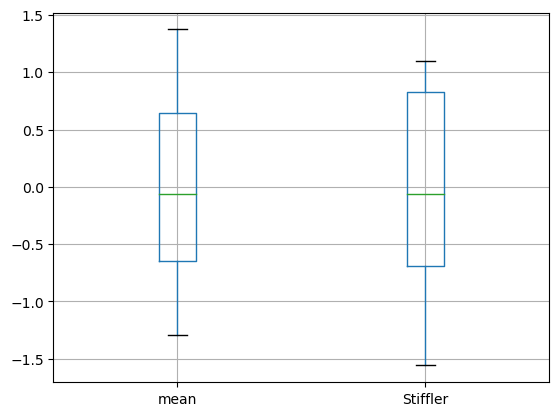

In [41]:
Concen_Align_Result_short['mean'] = pd.to_numeric(Concen_Align_Result_short['mean'])
Concen_Align_Result_short['Stiffler'] = pd.to_numeric(Concen_Align_Result_short['Stiffler'])

Concen_Align_Result_short.boxplot(column = ['mean', 'Stiffler'])

plt.show()

# are they similar enough to just take oine model ? 

# Hypothesentest :
 1. H0 = Variable Regions do have fragilie / low DMS Values: 
    - Problem = Data not normaly distributet
    
# gibts ne alternative ?

In [42]:
data_identical = Concen_Align_Result_short[Concen_Align_Result_short['Status'] == 'Identical']['mean']
data_different = Concen_Align_Result_short[Concen_Align_Result_short['Status'] == 'Different']['mean']

In [43]:
from scipy.stats import shapiro
#Normalverteilung überprüfen
# Extrahiere die Daten aus der Spalte in ein separates Array
data = Concen_Align_Result_short['mean'].dropna()  

# Führe den Shapiro-Wilk-Test durch
statistic, p_value = shapiro(data)

print('Shapiro-Wilk-Test Statistik:', statistic)
print('Shapiro-Wilk-Test p-Wert:', p_value)

Shapiro-Wilk-Test Statistik: 0.9444863796234131
Shapiro-Wilk-Test p-Wert: 2.1066490774046542e-08


In [44]:

data = data_different

# Führe den Shapiro-Wilk-Test durch
statistic, p_value = shapiro(data)

# Gib die Testergebnisse aus
print('Shapiro-Wilk-Test Statistik:', statistic)
print('Shapiro-Wilk-Test p-Wert:', p_value)

Shapiro-Wilk-Test Statistik: 0.951982319355011
Shapiro-Wilk-Test p-Wert: 0.009920644573867321


# Wilcoxon Rank Sum Test 
- Values of Mean DMS are grouped by 'Identical , 'Different'
- Wilcoxon Ranked Sum Test 
- Two sided test : H0 = No difference in DMS of Conserved and Not Conserved
-  Problem:
    - Identical = 193 
    - Different = 69

    Random Werte aus Identical auswählen und mean über alle Wilcoxon test berechnen: 

    1000 Runs: 
     - Durchschnittliche Teststatistik: 1124.909
     - Durchschnittlicher p-Wert: 0.6478203616373306

    10000 Runs:
     - Durchschnittliche Teststatistik: 1122.9197
     - Durchschnittlicher p-Wert: 0.641155545963515

     15000 Runs: 
    -  Durchschnittliche Teststatistik: 1123.9102666666668
    - Durchschnittlicher p-Wert: 0.6434579695313134

    18000 Runs: 
    - Durchschnittliche Teststatistik: 1122.7196666666666
    - Durchschnittlicher p-Wert: 0.6405447963911712

# Result 
 p-value is no significant and H0 can not be rejected
  - we can not show that there is a different distribution of DMS in Conserved or Unconserved regions 
    

In [45]:
# def assign_value(row):
#     if row['Status'] == 'Identical':
#         return 1
#     elif row['Status'] == 'Different':
#         return -1

# # Neue Spalte erstellen und Werte zuweisen
# Concen_Align_Result_short['Test_Koef'] = Concen_Align_Result_short.apply(assign_value, axis=1)

# # Datenframe anzeigen
# print(Concen_Align_Result_short)


In [46]:
# from scipy.stats import wilcoxon
# statistic, p_value = wilcoxon(Concen_Align_Result_short['mean'], Concen_Align_Result_short['Test_Koef'])

# # Ergebnis anzeigen
# print("Wilcoxon-Test Statistik:", statistic)
# print("Wilcoxon-Test p-Wert:", p_value)

In [47]:
import random
from scipy.stats import wilcoxon



num_iterations = 15000
test_statistics = []
p_values = []

for _ in range(num_iterations):
    # Zufällige 69 Werte auswählen aus Identical 
    random_identical_data = random.sample(list(data_identical ), 69)

    # Wilcoxon-Test durchführen
    statistic, p_value = wilcoxon(random_identical_data, data_different)

    # Teststatistik und p-Wert speichern
    test_statistics.append(statistic)
    p_values.append(p_value)

# Mittelwert der Teststatistik berechnen
mean_test_statistic = sum(test_statistics) / len(test_statistics)

# Durchschnittsp-Wert über die Iterationen berechnen
mean_p_value = sum(p_values) / len(p_values)

print(f"Durchschnittliche Teststatistik: {mean_test_statistic}")
print(f"Durchschnittlicher p-Wert: {mean_p_value}")

Durchschnittliche Teststatistik: 972.8593333333333
Durchschnittlicher p-Wert: 0.22360115540983683


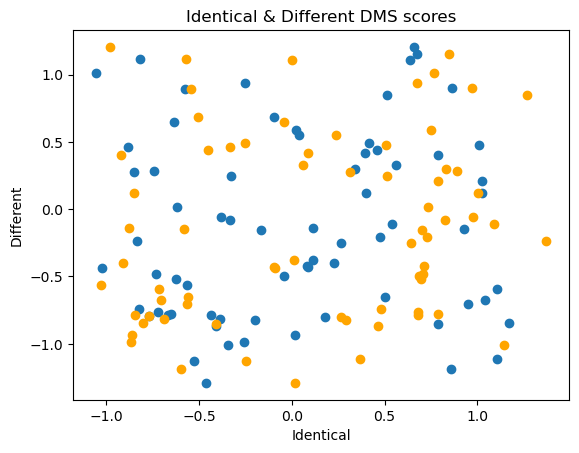

In [48]:


plt.scatter(data_identical[0:69], data_different)
plt.scatter(data_identical[124:193], data_different, color = 'orange')
plt.xlabel('Identical')
plt.ylabel('Different')
plt.title('Identical & Different DMS scores')
plt.show()

Identical and Different Positions do not show any trend in DMS score 


In [49]:
# x = range(0,69)
# width = 0.35
# fig, ax = plt.subplots()

# rects1 = ax.bar(x,data_identical[:69], width, label='Identical')
# rects2 = ax.bar(x,data_different, width, bottom=data_different, label='Different')

# ax.set_xlabel('Position')
# ax.set_ylabel('Werte')
# ax.set_title('Different & Identical Position DMS')
# ax.legend()

# plt.tight_layout()
# plt.show()

# Result :
- We can not make predictions with the consensus sequence 
    - maybe because the conservation of Blossum62 is to high with 62%
    - what about the 42% ? 
    - or find conserved regions at Uniprot/Blast and     look for correlation 
        - because we found correlation of the conservation score and the DMS --> approval with conserved regions 

Should be conserved: 
    - Active site : 68,166
    - Binding site : 232-234
    - Disulfid bond : 75-121

    

In [50]:
Concen_Align_Result_short['Shannon'] =conservation_Shannon_cut
Concen_Align_Result_short['Pei_Grisish'] = conservation_core_V

print(Concen_Align_Result_short)

    Position Blossum62 TEM-1     Status      mean  Stiffler     Shannon  \
23        24         -     x        Gap       NaN       NaN  285.129564   
24        25         A     A  Identical  0.510811  0.899390  302.569204   
25        26         H     x  Different  0.849455  0.998662  280.183668   
26        27         P     x  Different -0.426638 -0.510157  287.016947   
27        28         E     x  Different  0.208490  0.377421  313.585195   
..       ...       ...   ...        ...       ...       ...         ...   
281      282         A     x  Different -0.083719 -0.337803  333.244180   
282      283         S     A  Different  0.019167 -0.106276  323.616709   
283      284         L     L  Identical  0.735770  0.824699  307.673541   
284      285         I     I  Identical  0.368077  0.574070  337.915370   
285      286         K     x  Different -1.112715 -1.041095  394.621451   

     Pei_Grisish  
23      0.445044  
24      0.471359  
25      0.419883  
26      0.439056  
27  

In [51]:
# Neuer Dataframe
region_of_interest = pd.DataFrame()

# Positionen of interest
Active_S = Concen_Align_Result_short.iloc[43, :]
Active_S2 = Concen_Align_Result_short.iloc[141, :]
Bind_S =  Concen_Align_Result_short.iloc[207:210, :]
Disulf = Concen_Align_Result_short.iloc[50:97, :]

# hinzufügen
region_of_interest = region_of_interest.append(Active_S)
region_of_interest = region_of_interest.append(Active_S2)
region_of_interest = region_of_interest.append(Bind_S)
region_of_interest = region_of_interest.append(Disulf)

region_of_interest = region_of_interest.reset_index(drop=True)

#print(region_of_interest)


Shannon = z_score(C_df_New['Conserved_Shannon'])
Pei_Grisish= z_score(C_df_New['Conserved'])

region_of_interest['Shannon'] = Shannon
region_of_interest['Pei_Grisish']= Pei_Grisish

print(region_of_interest['mean'].mean())
print(region_of_interest['Stiffler'].mean())
print(region_of_interest['Shannon'].mean())
print(region_of_interest['Pei_Grisish'].mean())




0.02678567125012766
0.07730970506283594
-0.3808635063528412
-0.3685812073486401


C:\Users\sveam\AppData\Local\Temp\ipykernel_2584\3812105710.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  region_of_interest = region_of_interest.append(Active_S)
C:\Users\sveam\AppData\Local\Temp\ipykernel_2584\3812105710.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  region_of_interest = region_of_interest.append(Active_S2)
C:\Users\sveam\AppData\Local\Temp\ipykernel_2584\3812105710.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  region_of_interest = region_of_interest.append(Bind_S)
C:\Users\sveam\AppData\Local\Temp\ipykernel_2584\3812105710.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  region_of_interest = r

#Sind das die richtigen conservation values ? 

Mean doesnt show huge fragility:

Mean Val of all merged values Shannon: -0.051339 vs. -0.3808635063528412

Mean Val of all merged val Pei& Grishin : -0.693817 vs. -0.3685812073486401

DMS mean of mean :??? DMS mean of interesting regions: 0.0267856712501276


Regions with 5% lowest/highest conservation score: 
 - Wilcoxon test 